In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

In [2]:
pip install chardet


The following command must be run outside of the IPython shell:

    $ pip install chardet

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more information on how to install packages:

    https://docs.python.org/3/installing/


In [3]:
import chardet

with open('8.x_commit_log.csv', 'rb') as file:
    result = chardet.detect(file.read())
    print(result)  # 会返回 {'encoding': '编码类型'}

{'encoding': 'Windows-1254', 'confidence': 0.5564570378504359, 'language': 'Turkish'}


In [8]:
# 设置图形的默认样式
sns.set(style="whitegrid")

df = pd.read_csv('8.x_commit_log.csv', encoding='ISO-8859-1',usecols=[0,1,2,4,5],low_memory=False)

In [9]:
# 显示数据的前几行，检查数据结构
df.head()

,commit_hash,author,commit_date,commit_summary,Unnamed: 5
0,65a502845b,Tim Abbott,2024/7/31,Release Zulip Server 8.5.,NaN
1,5f6f4dab0d,Alex Vandiver,2024/7/31,docs: Add OS upgrade instructions for 22.04 to...,(cherry picked from commit 604e328038d13434932...
2,27a16b85fb,Alex Vandiver,2024/7/31,"docs: Remove an e.g."" when we have explicit st...",(cherry picked from commit 5df48dd4d0fae545a0c...
3,ee56ba45fc,Alex Vandiver,2024/7/31,docs: Document the dialogs shown by needrestar...,(cherry picked from commit 7594d2eecfd312675f6...
4,ef8288f132,Alex Vandiver,2024/7/31,docs: Document when to restart the server.,(cherry picked from commit 49a9405aad717a6ef94...


In [10]:
# 将提交日期列转换为 datetime 类型
df['commit_date'] = pd.to_datetime(df['commit_date'], errors='coerce')

# 检查是否有缺失值
df.isnull().sum()

# 删除含有缺失提交日期的行（如果有的话）
df = df.dropna(subset=['commit_date'])

In [11]:
# 强制将 commit_date 转换为 datetime 类型，并处理无效日期（将无效日期设置为 NaT）
df['commit_date'] = pd.to_datetime(df['commit_date'], errors='coerce')

# 检查是否有空值或无效日期，去除这些行
df = df.dropna(subset=['commit_date'])

# 将 commit_date 列转换为 "Period" 类型的月
df['month'] = df['commit_date'].dt.to_period('M')

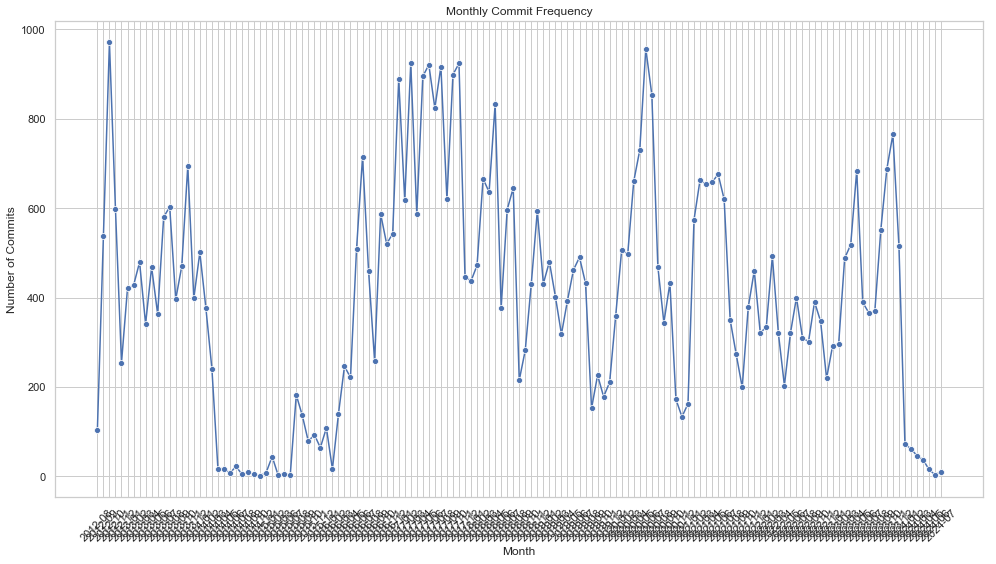

In [12]:
# 转换 'month' 列为字符串类型
df['month_str'] = df['month'].astype(str)

# 按月统计提交次数
monthly_commits = df.groupby('month_str').size().reset_index(name='commit_count')

# 绘制每月提交数量的趋势图
plt.figure(figsize=(14, 8))
sns.lineplot(x='month_str', y='commit_count', data=monthly_commits, marker='o', color='b')
plt.title('Monthly Commit Frequency')
plt.xlabel('Month')
plt.ylabel('Number of Commits')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

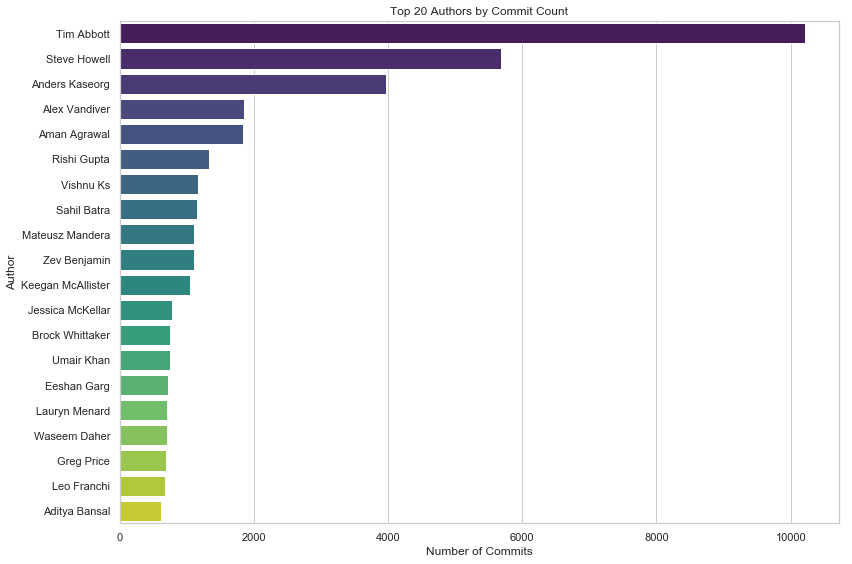

In [13]:
# 按提交者统计提交次数
author_commit_count = df['author'].value_counts().reset_index()
author_commit_count.columns = ['author', 'commit_count']

# 绘制提交者的提交数量柱状图（显示前20名）
plt.figure(figsize=(12, 8))
sns.barplot(x='commit_count', y='author', data=author_commit_count.head(20), palette='viridis')
plt.title('Top 20 Authors by Commit Count')
plt.xlabel('Number of Commits')
plt.ylabel('Author')
plt.tight_layout()
plt.show()

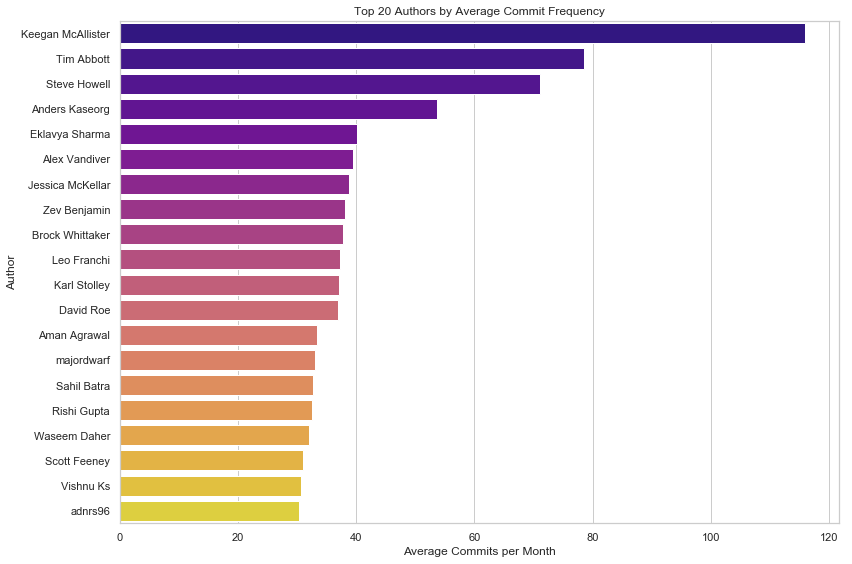

In [14]:
# 计算每位提交者的月度提交数量
df['month'] = df['commit_date'].dt.to_period('M')
author_monthly_commits = df.groupby(['author', 'month']).size().reset_index(name='commit_count')

# 计算每位提交者的平均提交频率
author_avg_commits = author_monthly_commits.groupby('author')['commit_count'].mean().reset_index().sort_values(by='commit_count', ascending=False)

# 绘制每位提交者的平均提交频率柱状图（显示前20名）
plt.figure(figsize=(12, 8))
sns.barplot(x='commit_count', y='author', data=author_avg_commits.head(20), palette='plasma')
plt.title('Top 20 Authors by Average Commit Frequency')
plt.xlabel('Average Commits per Month')
plt.ylabel('Author')
plt.tight_layout()
plt.show()

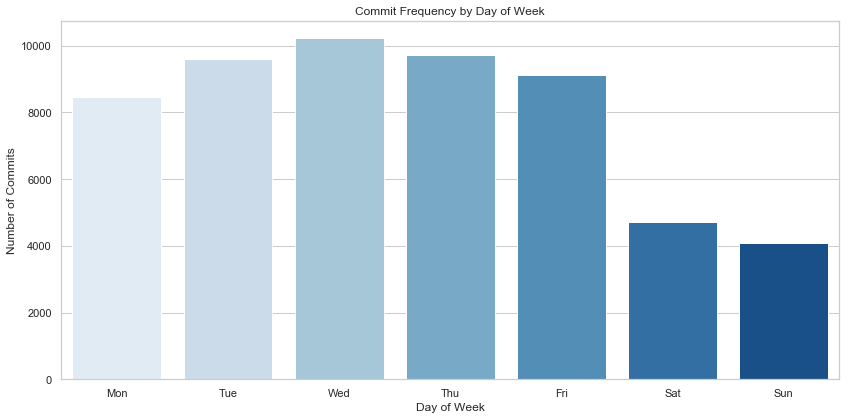

In [15]:
# 提取星期几
df['weekday'] = df['commit_date'].dt.dayofweek

# 按星期几统计提交数量
weekday_commits = df.groupby('weekday').size().reset_index(name='commit_count')

# 绘制按星期几提交数量的柱状图
plt.figure(figsize=(12, 6))
sns.barplot(x='weekday', y='commit_count', data=weekday_commits, palette='Blues')
plt.title('Commit Frequency by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Commits')
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.tight_layout()
plt.show()

In [16]:
!pip install wordcloud

DEPRECATION: pandas 0.23.4 has a non-standard dependency specifier pytz>=2011k. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pandas or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


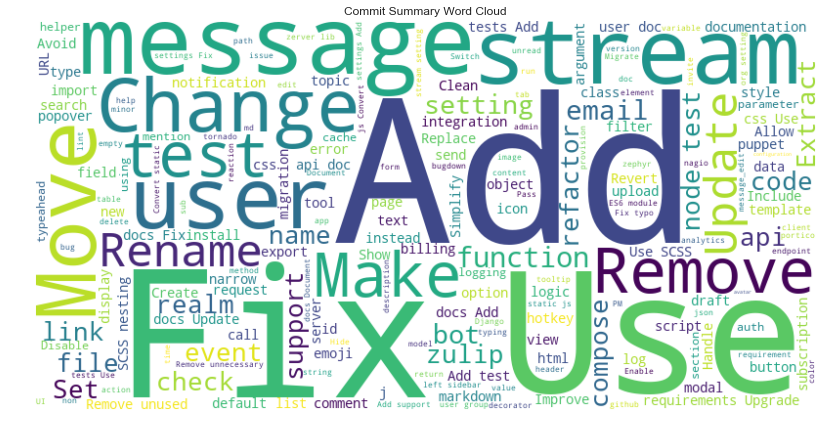

In [17]:
from wordcloud import WordCloud

# 合并所有提交摘要
commit_summary = df['commit_summary'].dropna().str.cat(sep=' ')

# 生成词云
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(commit_summary)

# 显示词云
plt.figure(figsize=(14, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Commit Summary Word Cloud')
plt.show()